In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import MySQLdb
import pandas.io.sql as psql
from sklearn.preprocessing import LabelEncoder

In [10]:
##COPY PASTE OF NEED MODULES
def get_db_url(comm = '!', database = '!'):
    db=MySQLdb.connect(host='!', user = '!', \
    passwd = 'RJXCMCahj151i781JMtY1T2NoIoH6KaG', db=database)
    return psql.read_sql(comm, con=db)



def add_telco(data):
    ##STREAMING
    data['stream_count'] = (data['streaming_tv'].apply(lambda x : 1 if x == 'Yes' else 0)) + (data['streaming_movies'].apply(lambda x : 1 if x == 'Yes' else 0))
    data['stream'] = data['stream_count'].apply(lambda x : 1 if x > 0 else 0)
    data['techie'] = data['phone_service']
    data['fiber_support'] = (data['tech_support'] == 'Yes') & (data['internet_service_type_id'] == 2)
    ##BACK_END
    data['churn'] = data['churn'].apply(lambda x: 1 if x == 'Yes' else 0)
    data['secure_count'] = (data['online_security'].apply(lambda x : 1 if x == 'Yes' else 0)) + \
                     (data['online_backup'].apply(lambda x : 1 if x == 'Yes' else 0)) + \
                     (data['device_protection'].apply(lambda x : 1 if x == 'Yes' else 0)) + \
                     (data['tech_support'].apply(lambda x : 1 if x == 'Yes' else 0)) + \
                     (data['streaming_movies'].apply(lambda x : 1 if x == 'Yes' else 0)) + \
                     (data['streaming_tv'].apply(lambda x : 1 if x == 'Yes' else 0))
                     
    
    data['secure'] = data['secure_count'].apply(lambda x : 1 if x > 0 else 0)
    data['two_year'] = (data['contract_type_id'] == 3) & (data['tenure'] > 12)
    data['partner_dependents'] = (data['partner'].apply(lambda x: 1 if x == 'Yes' else 0)) + (data['dependents'].apply(lambda x: 2 if x == 'Yes' else 0))
    print('!!!')
    return data

def prep_telco(data):
    encoder = LabelEncoder() 
    data = data.drop(columns = ['customer_id', 'gender'])
    encode_list = ['partner', 'dependents', 'online_security', 'online_backup','device_protection','tech_support','fiber_support', 'streaming_tv', \
                   'streaming_movies', 'paperless_billing', 'churn', 'phone_service','multiple_lines']
    for e in encode_list:
        data[e] = encoder.fit_transform(data[e])
    return data



In [11]:
##GETTING TELCO_DATA

telco_data =get_db_url(comm = """SELECT * 
FROM customers WHERE total_charges 
NOT LIKE ' ';""", database = 'telco_churn')
telco_data = add_telco(telco_data)

!!!


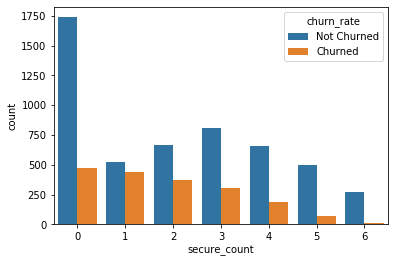

In [12]:
##COUNT PLOT TO SURE RETENTION
#A simple count plot that shows the difference in overall customers
#and wether they churned

telco_data['churn_rate'] = telco_data['churn'].apply(lambda x: 'Churned' if x == 1 else 'Not Churned')
sns.countplot(data = telco_data, x = 'secure_count', hue = 'churn_rate')
plt.show()

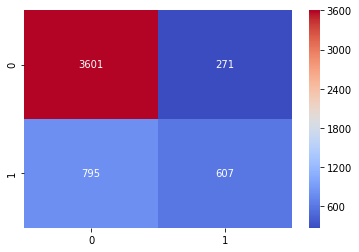

In [13]:
##HEATMAP OF CONFUSION MATRIX

heat = [[3601,271],[795,607]]

ax = sns.heatmap(pd.DataFrame(heat), annot=True, fmt = 'g', cmap = 'coolwarm')
plt.show()

In [17]:
telco_data = prep_telco(telco_data)

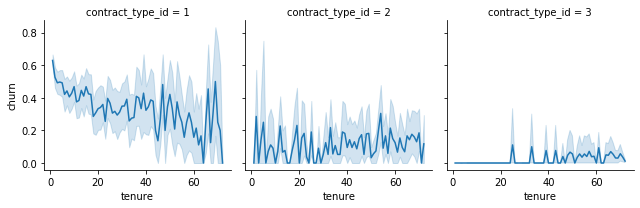

In [19]:
##CONTRACT TYPES AGAINST CHURN AND TENURE

g = sns.FacetGrid(telco_data, col="contract_type_id")
g.map(sns.lineplot, "tenure", 'churn');

plt.show()

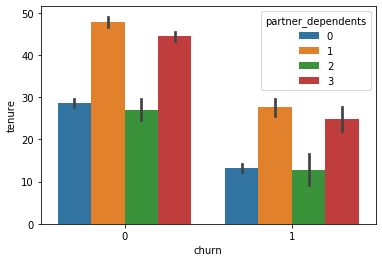

In [20]:
##HOME STRUCTURE AGAINST TENURE AND CHURN
#To show no corrolation between home structure and churn rate

sns.barplot(y = 'tenure', x = 'churn', hue = 'partner_dependents', data = telco_data)

plt.show()

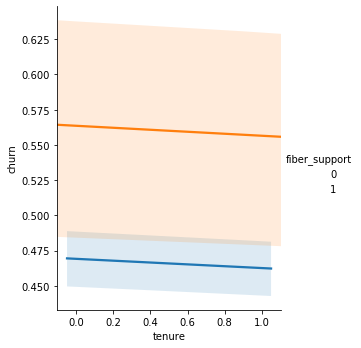

In [21]:
##PEOPLE WITH FIBER OPTIC AND TECH SUPPORT AGAINST TENURE AND CHURN
#regression line on tenure of fiber support customers

g = sns.pairplot(telco_data, y_vars=["churn"], x_vars=["tenure"],
             hue="fiber_support", height=5, aspect=.8, kind="reg", markers = '');
plt.show()